In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
IMG_SIZE=256
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)
train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1506 images belonging to 3 classes.


In [11]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)
val_generator=train_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)
test_generator=train_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 431 images belonging to 3 classes.


In [25]:
class_names = list(test_generator.class_indices.keys())

In [6]:
CHANNELS=3
inp_shape=(IMG_SIZE,IMG_SIZE,CHANNELS)
n_classes=3

model = models.Sequential([
    layers.InputLayer(input_shape=inp_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=val_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

C:\Users\cs23b\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 369s 8s/step - accuracy: 0.4827 - loss: 0.9549 - val_accuracy: 0.4583 - val_loss: 0.8752
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:25 7s/step - accuracy: 0.5312 - loss: 0.8388

C:\Users\cs23b\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 718ms/step - accuracy: 0.5312 - loss: 0.8388 - val_accuracy: 0.5833 - val_loss: 0.8648
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 297s 6s/step - accuracy: 0.6352 - loss: 0.7493 - val_accuracy: 0.6406 - val_loss: 0.7988
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 399ms/step - accuracy: 1.0000 - loss: 0.5919 - val_accuracy: 0.7135 - val_loss: 0.7092
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 300s 6s/step - accuracy: 0.7744 - loss: 0.5432 - val_accuracy: 0.6406 - val_loss: 0.7806
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 420ms/step - accuracy: 0.6875 - loss: 0.7050 - val_accuracy: 0.7031 - val_loss: 0.6821
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 304s 6s/step - accuracy: 0.8211 - loss: 0.4419 - val_accuracy: 0.8698 - val_loss: 0.3322
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 363ms/step - accuracy: 0.7812 - loss: 0.3824 - val_accuracy: 0.9010 - val_loss: 0.2577
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 263s 6s/step - accuracy: 0.9122 - loss: 0.2253 - val_accuracy: 0.9219 - val_

In [16]:
scores=model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9569 - loss: 0.1212


In [28]:
import numpy as np
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


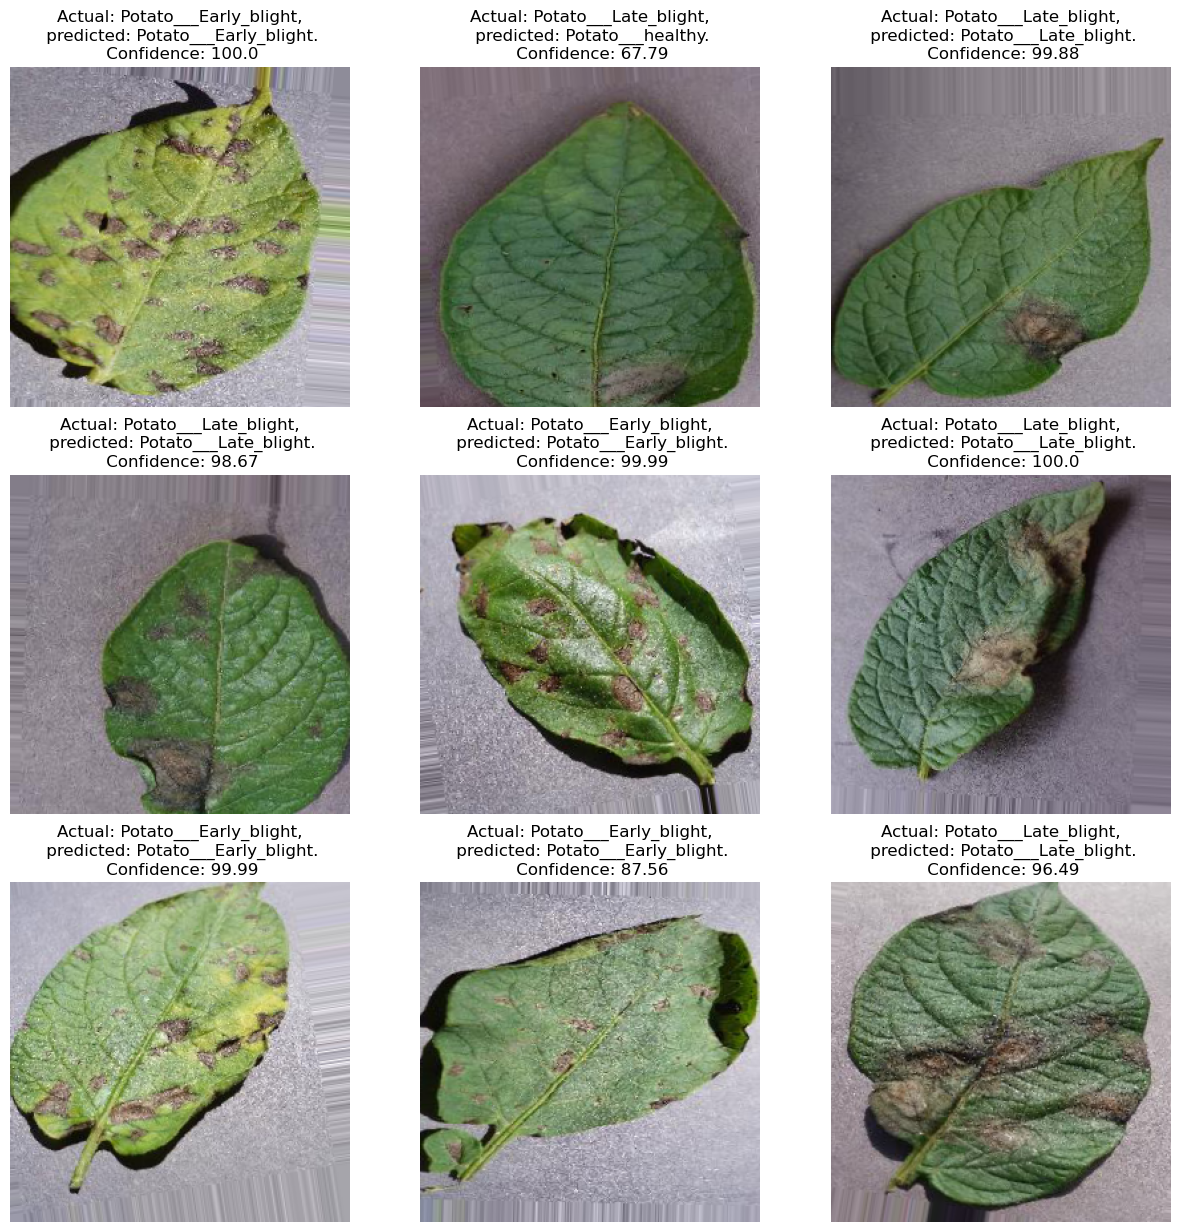

In [29]:
plt.figure(figsize=(15,15))
for images,labels in test_generator:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[int(labels[i])]
        plt.title(f"Actual: {actual_class},\n predicted: {predicted_class}.\n Confidence: {confidence}")
        plt.axis("off")
    break

In [31]:
model.save(r"C:\Users\cs23b\potato_disease_predictor\model_v1.h5")